In [1]:
import numpy as np
import healpy as hp
from rubin_sim.scheduler.surveys import generate_dd_surveys, Deep_drilling_survey
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import _hpid2RaDec, _angularSeparation
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
from copy import deepcopy
import os

In [2]:
ddf_surveys = generate_dd_surveys()
#ddf_surveys = [ddf for ddf in ddf_surveys if ddf.survey_name != "DD:EDFS"]
# Add on the Euclid field as one



#ddf_surveys.append(
#    Deep_drilling_survey([], 58.97, -49.28, survey_name="DD:EDFSa")
#)
#ddf_surveys.append(
#    Deep_drilling_survey([], 63.6, -47.60, survey_name="DD:EDFSb")
#)

In [3]:
nside = 16
ra,dec = _hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))
baseline_file = get_baseline()

runName = os.path.basename(baseline_file).replace('.db', '')

In [16]:
bundle_list = []
sql = ''
radius = np.radians(4.)

plotFuncs = [maf.HealpixSkyMap()]

summary_stats = [maf.MeanMetric(), maf.MedianMetric()]

depth_stats = [maf.MedianMetric()]


for ddf in ddf_surveys:
    label = ddf.survey_name.replace('DD:', '')
    plotDict = {'visufunc': hp.gnomview,
               'rot': (np.degrees(np.mean(ddf.ra)), np.degrees(np.mean(ddf.dec)), 0),
               'xsize': 500}
    dist = _angularSeparation(ra, dec, np.mean(ddf.ra), np.mean(ddf.dec))
    good = np.where(dist <= radius)[0]
    
    # Number of SNe
    slicer = maf.HealpixSubsetSlicer(nside, good)
    metric = maf.metrics.SNNSNMetric(verbose=False, metricName='%s, SNe' % label)
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs,
                                       summaryMetrics=summary_stats))

    # Strong lensed SNe
    metric = maf.SNSLMetric(metricName="SnL_%s" % label)
    bundle_list.append(maf.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs,
                    summaryMetrics=summary_stats))
    
    # Number of QSOs in each band
    zmin = 0.3
    extinction_cut=1.0
    for f in 'ugrizy':
        summaryMetrics = [maf.SumMetric(metricName="Total QSO")]
        metric = maf.QSONumberCountsMetric(
                f,
                units="mag",
                extinction_cut=extinction_cut,
                qlf_module="Shen20",
                qlf_model="A",
                SED_model="Richards06",
                zmin=zmin,
                zmax=None,
            metricName='QSO_N_%s_%s' % (f, label)
            )
        bundle_list.append(maf.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs,
                    summaryMetrics=summaryMetrics))
    
    
    
    # Coadded depth per filter, and count per filter
    for filtername in 'ugrizy':
        metric = maf.Coaddm5Metric(metricName='%s, 5-sigma %s' % (label, filtername))
        sql = 'filter="%s"' % filtername
        bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                                           runName=runName, plotFuncs=plotFuncs, summaryMetrics=depth_stats))
        
        metric = maf.CountMetric(col='night', units='#', metricName='%s, Count %s' % (label, filtername))
        sql = 'filter="%s"' % filtername
        bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                                           runName=runName, plotFuncs=plotFuncs, summaryMetrics=depth_stats))
    # Count over all filter
    metric = maf.CountMetric(col='night',units='#', metricName='%s, Count all' % (label))
    sql = ''
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                                       runName=runName, plotFuncs=plotFuncs, summaryMetrics=depth_stats))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying table None with no constraint for columns ['visitExposureTime', 'night', 'filter', 'fieldDec', 'fieldRA', 'observationId', 'visitTime', 'seeingFwhmEff', 'airmass', 'observationStartMJD', 'numExposures', 'rotSkyPos', 'skyBrightness', 'fiveSigmaDepth'].
Found 2045493 visits
Running:  ['opsim_ELAISS1_SNe_HEAL', 'opsim_SnL_ELAISS1_HEAL', 'opsim_QSO_N_u_ELAISS1_HEAL', 'opsim_QSO_N_g_ELAISS1_HEAL', 'opsim_QSO_N_r_ELAISS1_HEAL', 'opsim_QSO_N_i_ELAISS1_HEAL', 'opsim_QSO_N_z_ELAISS1_HEAL', 'opsim_QSO_N_y_ELAISS1_HEAL', 'baseline_nexp2_v1_7_10yrs_ELAISS1_Count_all_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_XMM-LSS_SNe_HEAL', 'opsim_SnL_XMM-LSS_HEAL', 'opsim_QSO_N_u_XMM-LSS_HEAL', 'opsim_QSO_N_g_XMM-LSS_HEAL', 'opsim_QSO_N_r_XMM-LSS_HEAL', 'opsim_QSO_N_i_XMM-LSS_HEAL', 'opsim_QSO_N_z_XMM-LSS_HEAL', 'opsim_QSO_N_y_XMM-LSS_HEAL', 'baseline_nexp2_v1_7_10yrs_XMM-LSS_Count_all_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/stackers/baseStacker.py:132: UserWarning: Warning - column saturation_mag already present in simData, may be overwritten (depending on stacker).
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_ECDFS_SNe_HEAL', 'opsim_SnL_ECDFS_HEAL', 'opsim_QSO_N_u_ECDFS_HEAL', 'opsim_QSO_N_g_ECDFS_HEAL', 'opsim_QSO_N_r_ECDFS_HEAL', 'opsim_QSO_N_i_ECDFS_HEAL', 'opsim_QSO_N_z_ECDFS_HEAL', 'opsim_QSO_N_y_ECDFS_HEAL', 'baseline_nexp2_v1_7_10yrs_ECDFS_Count_all_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/stackers/baseStacker.py:132: UserWarning: Warning - column saturation_mag already present in simData, may be overwritten (depending on stacker).
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_COSMOS_SNe_HEAL', 'opsim_SnL_COSMOS_HEAL', 'opsim_QSO_N_u_COSMOS_HEAL', 'opsim_QSO_N_g_COSMOS_HEAL', 'opsim_QSO_N_r_COSMOS_HEAL', 'opsim_QSO_N_i_COSMOS_HEAL', 'opsim_QSO_N_z_COSMOS_HEAL', 'opsim_QSO_N_y_COSMOS_HEAL', 'baseline_nexp2_v1_7_10yrs_COSMOS_Count_all_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/stackers/baseStacker.py:132: UserWarning: Warning - column saturation_mag already present in simData, may be overwritten (depending on stacker).
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_EDFS_SNe_HEAL', 'opsim_SnL_EDFS_HEAL', 'opsim_QSO_N_u_EDFS_HEAL', 'opsim_QSO_N_g_EDFS_HEAL', 'opsim_QSO_N_r_EDFS_HEAL', 'opsim_QSO_N_i_EDFS_HEAL', 'opsim_QSO_N_z_EDFS_HEAL', 'opsim_QSO_N_y_EDFS_HEAL', 'baseline_nexp2_v1_7_10yrs_EDFS_Count_all_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/stackers/baseStacker.py:132: UserWarning: Warning - column saturation_mag already present in simData, may be overwritten (depending on stacker).
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="g" for columns ['night', 'fieldDec', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth']
Found 205011 visits
Running:  ['baseline_nexp2_v1_7_10yrs_ELAISS1_5-sigma_g_g_HEAL', 'baseline_nexp2_v1_7_10yrs_ELAISS1_Count_g_g_HEAL']
Completed metric generation.
Running:  ['baseline_nexp2_v1_7_10yrs_XMM-LSS_5-sigma_g_g_HEAL', 'baseline_nexp2_v1_7_10yrs_XMM-LSS_Count_g_g_HEAL']
Completed metric generation.
Running:  ['baseline_nexp2_v1_7_10yrs_ECDFS_5-sigma_g_g_HEAL', 'baseline_nexp2_v1_7_10yrs_ECDFS_Count_g_g_HEAL']
Completed metric generation.
Running:  ['baseline_nexp2_v1_7_10yrs_COSMOS_5-sigma_g_g_HEAL', 'baseline_nexp2_v1_7_10yrs_COSMOS_Count_g_g_HEAL']
Completed metric generation.
Running:  ['baseline_nexp2_v1_7_10yrs_EDFS_5-sigma_g_g_HEAL', 'baseline_nexp2_v1_7_10yrs_EDFS_Count_g_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statist

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.7

Plotting complete.
Plotting figures with "filter="g"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="u"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="y"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="i"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="r"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="z"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.


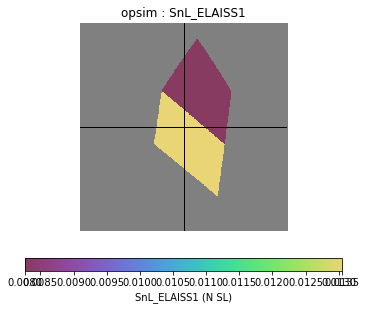

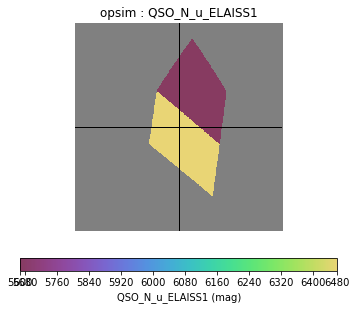

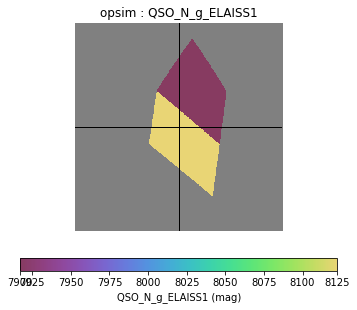

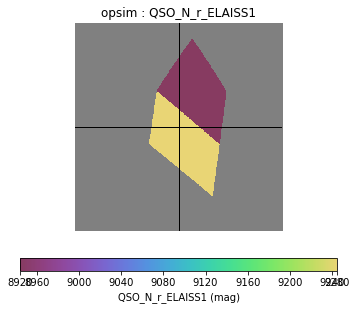

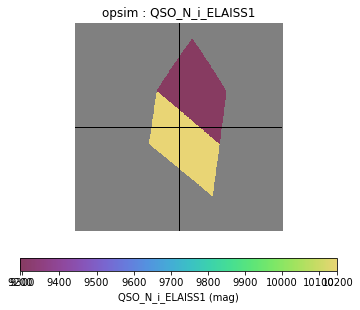

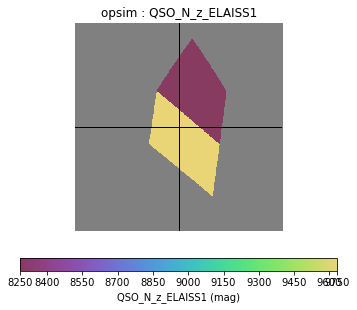

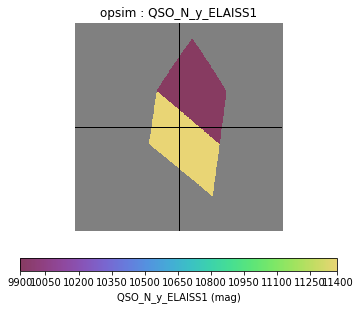

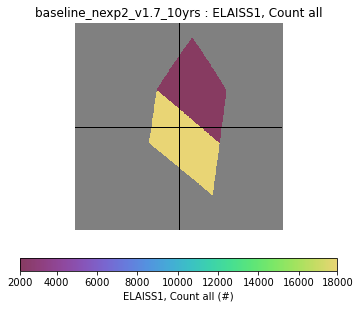

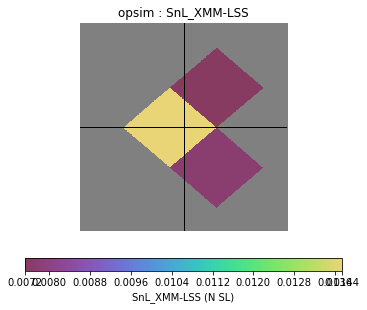

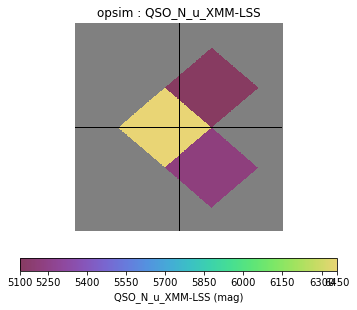

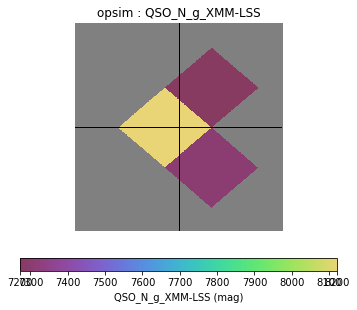

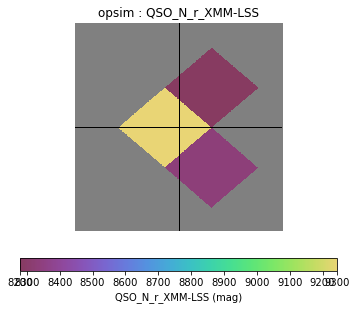

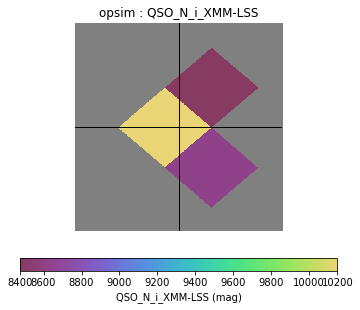

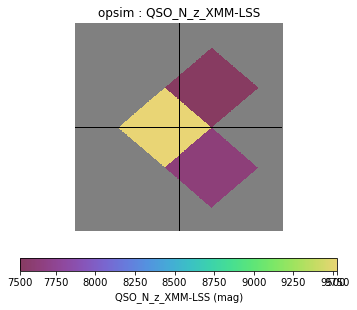

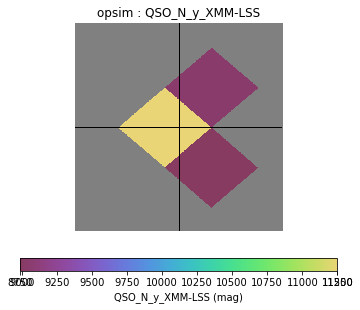

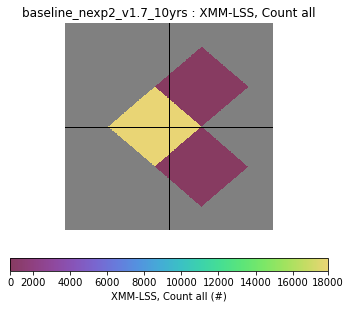

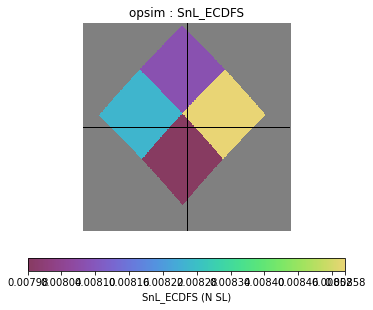

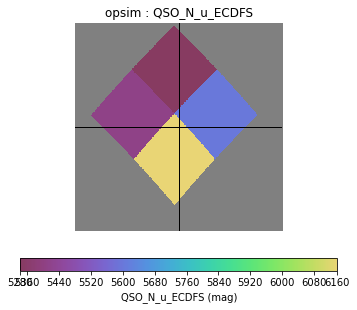

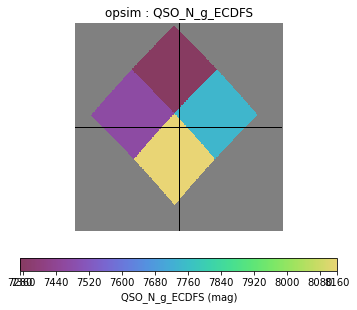

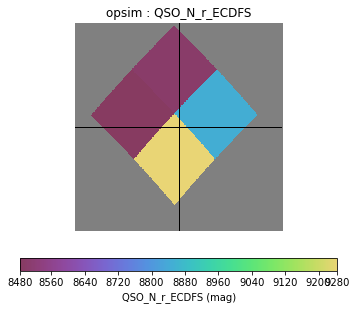

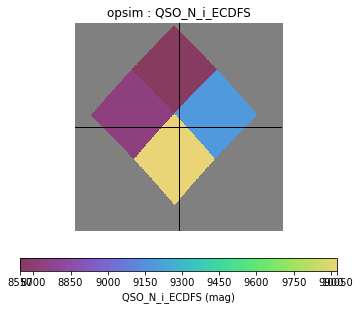

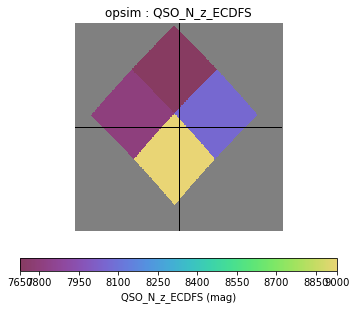

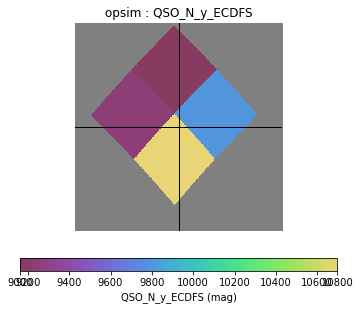

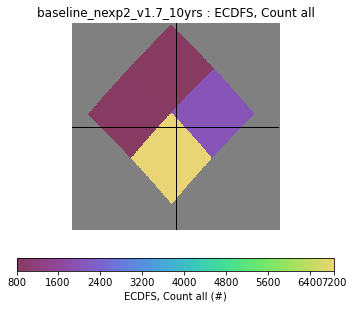

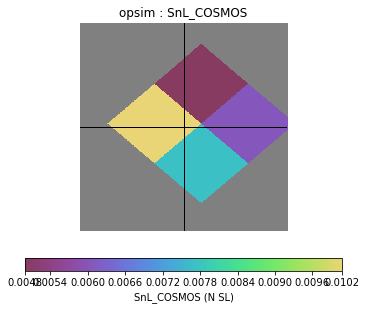

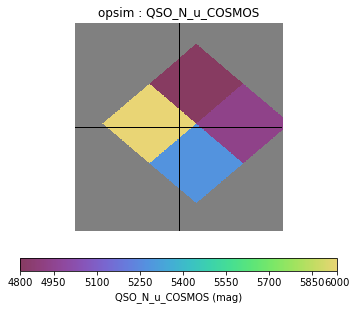

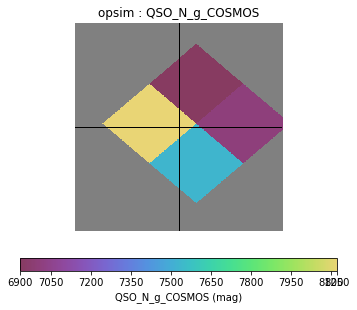

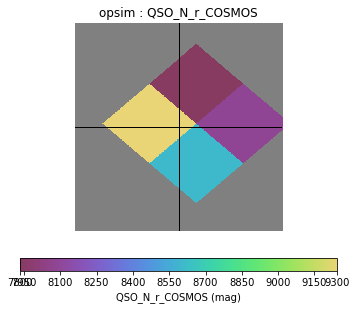

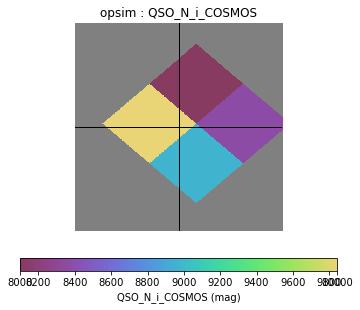

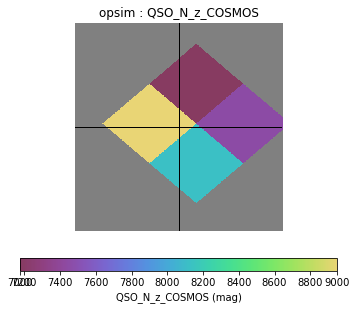

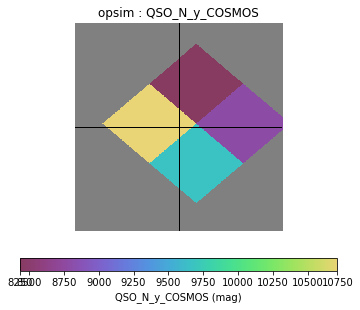

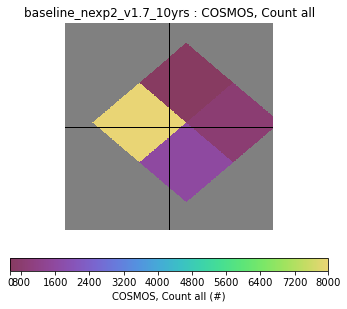

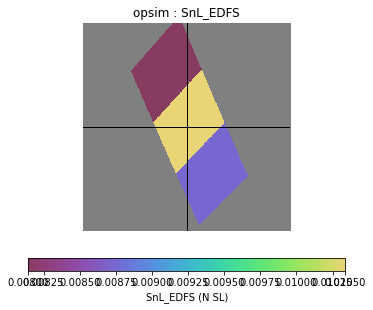

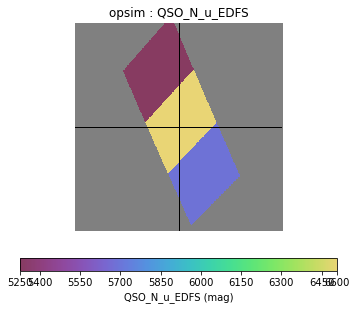

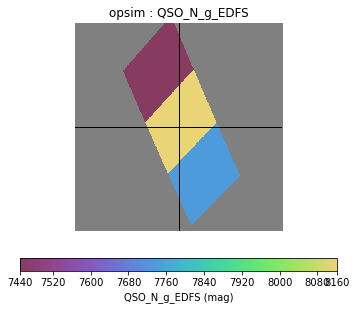

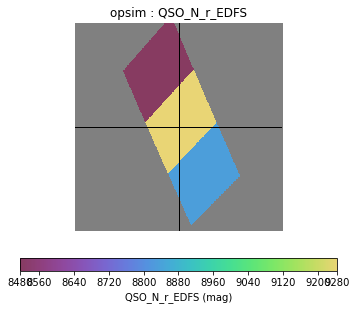

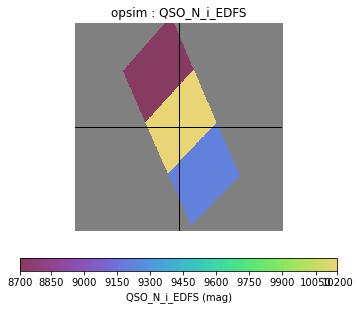

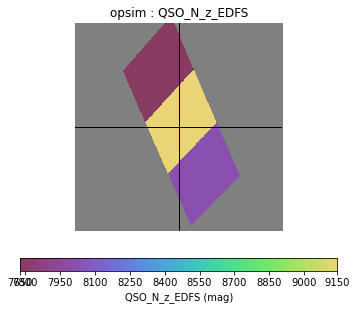

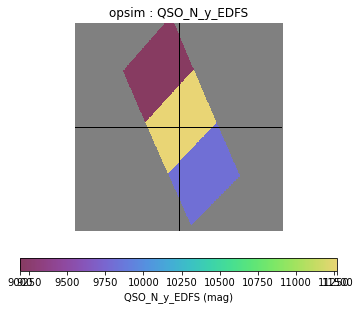

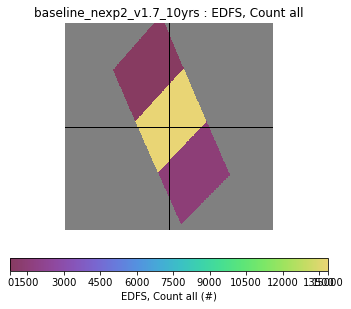

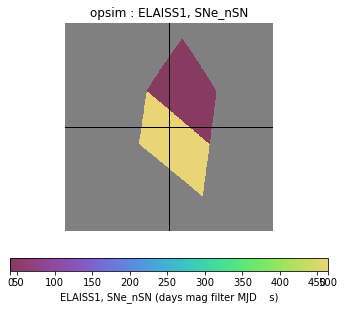

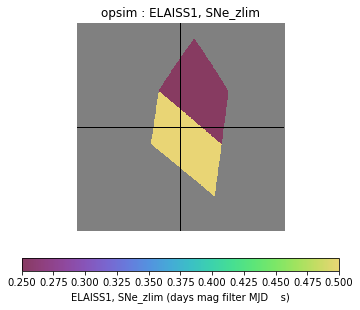

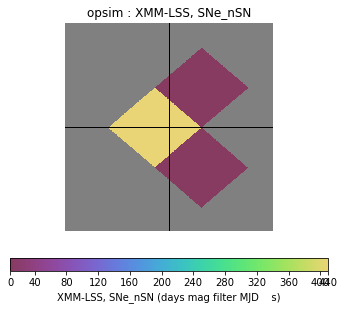

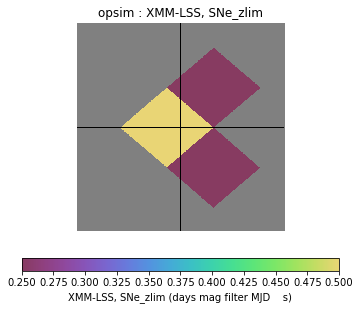

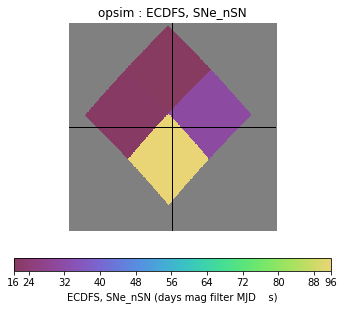

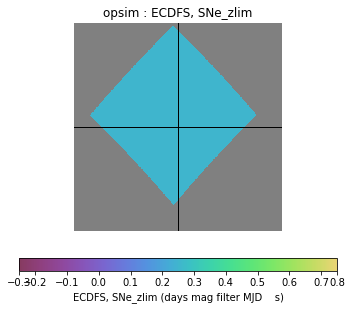

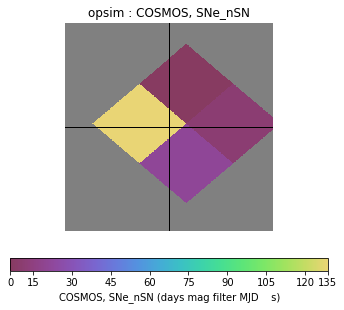

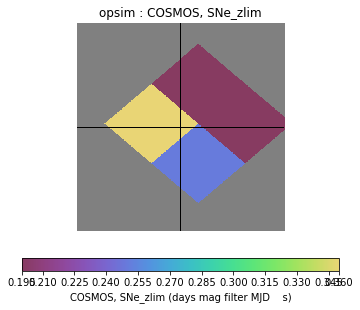

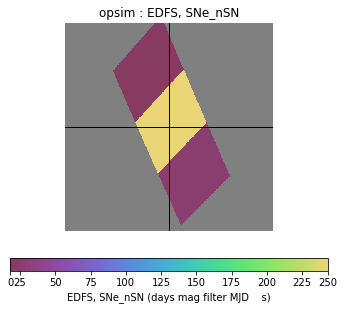

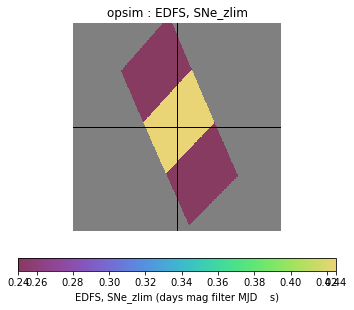

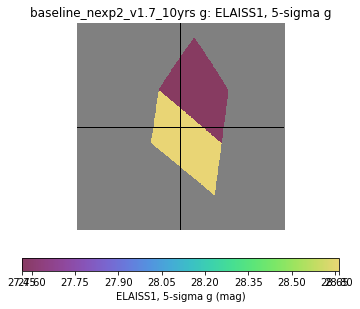

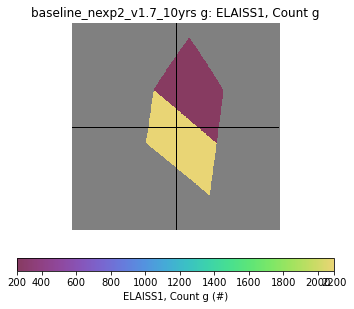

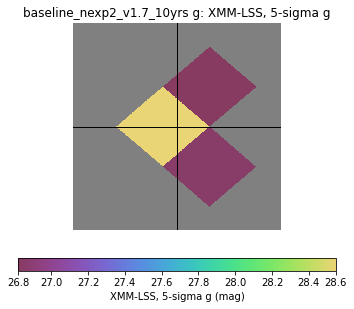

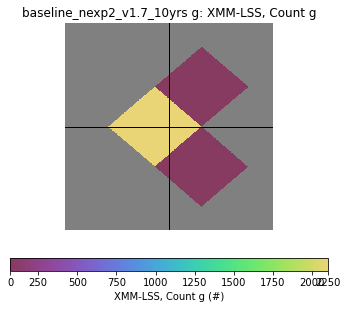

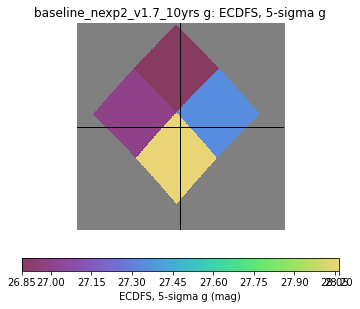

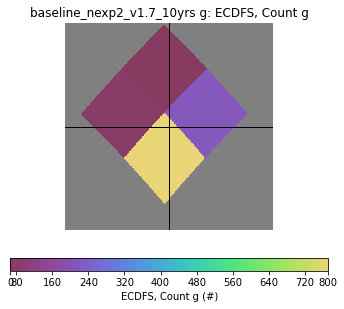

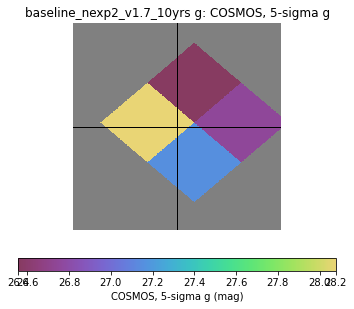

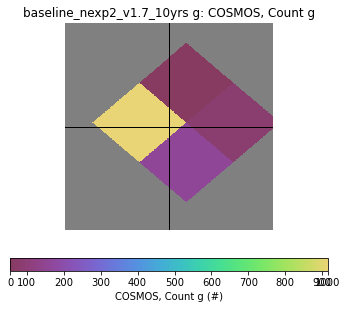

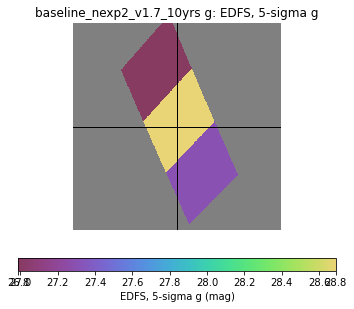

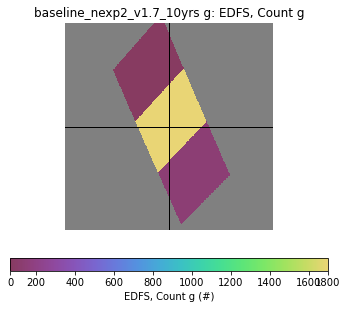

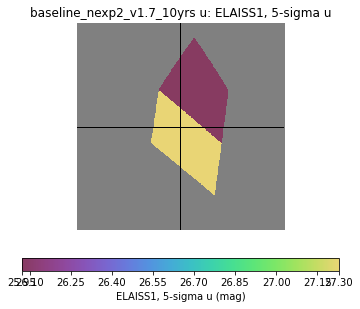

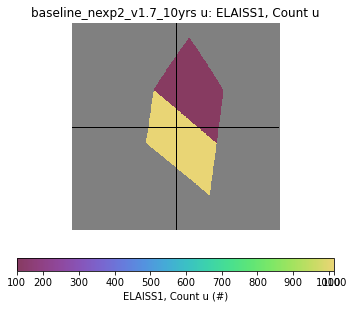

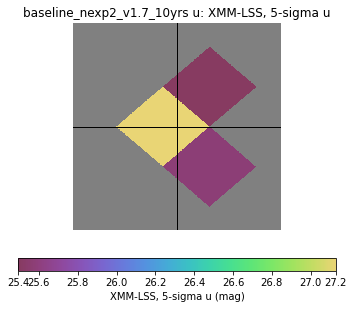

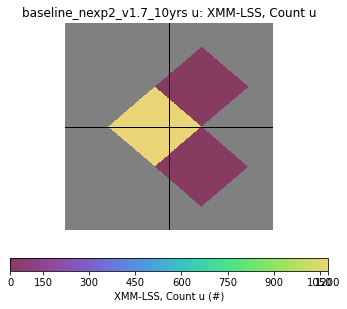

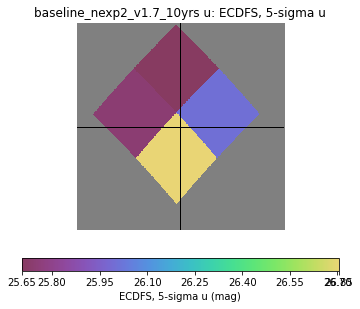

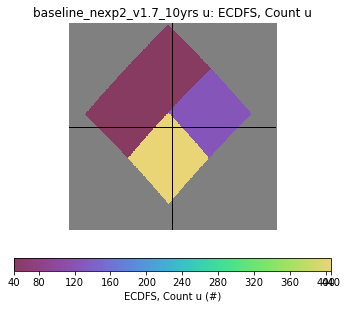

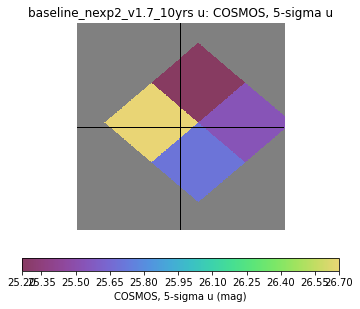

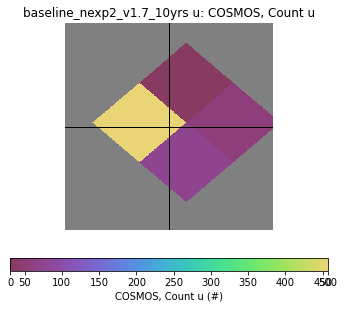

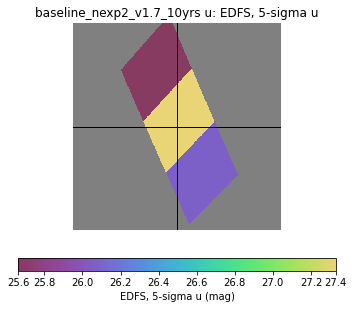

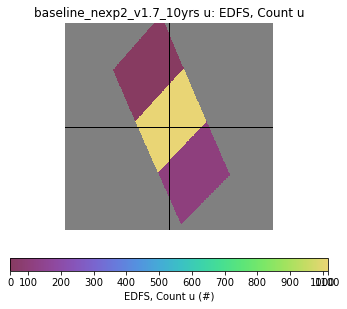

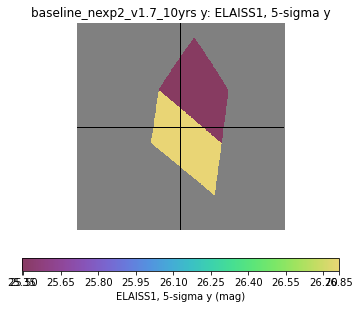

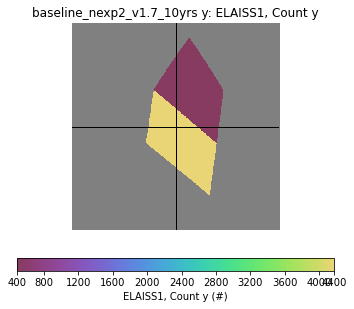

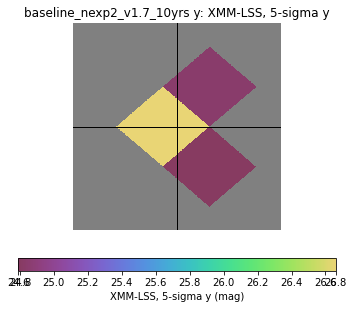

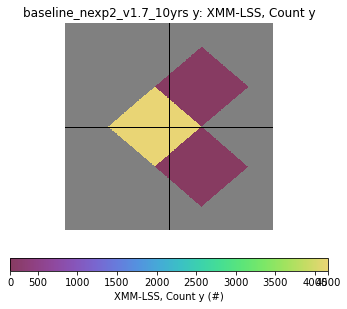

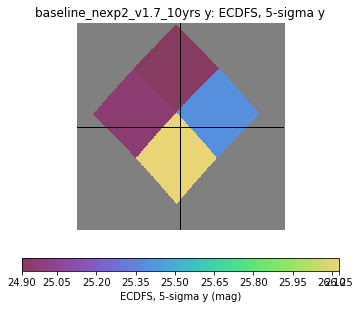

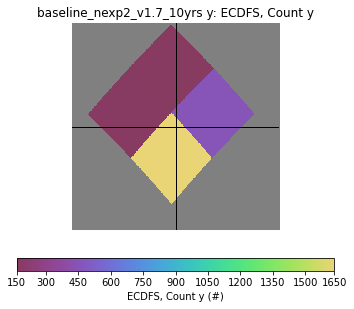

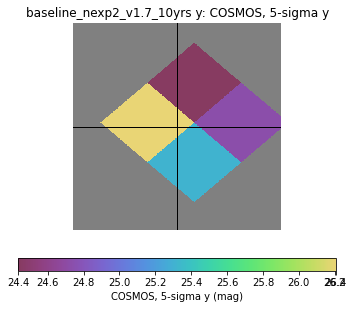

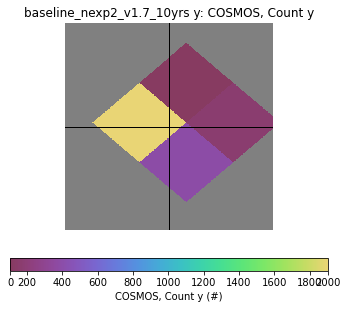

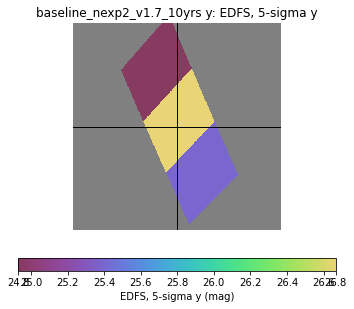

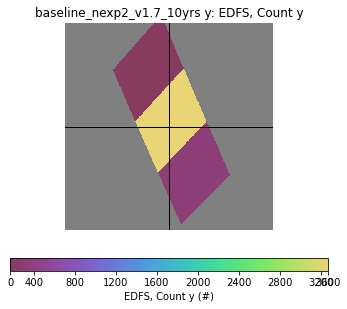

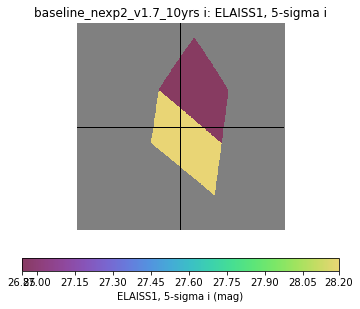

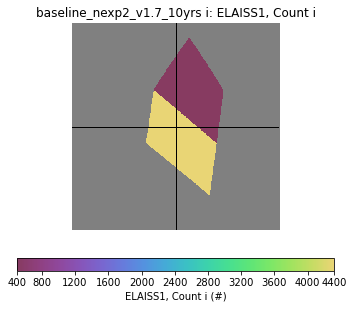

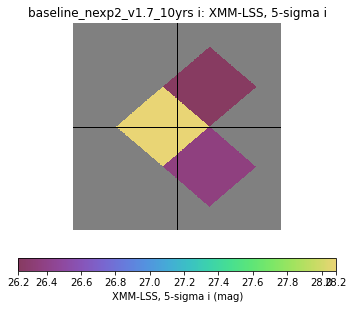

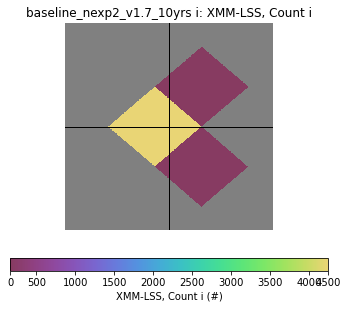

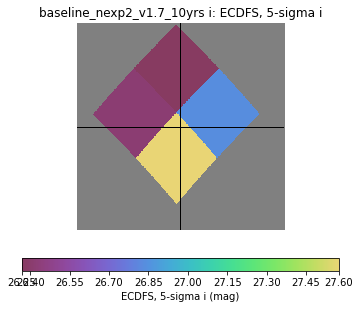

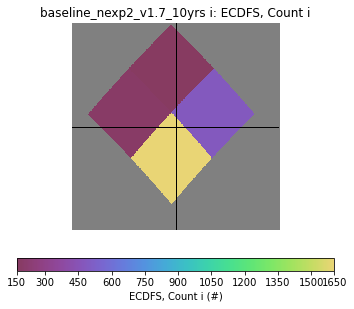

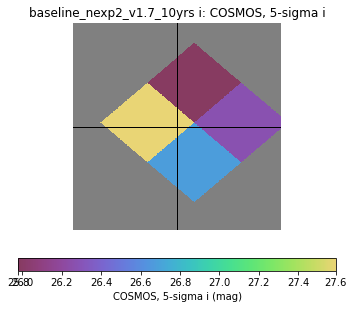

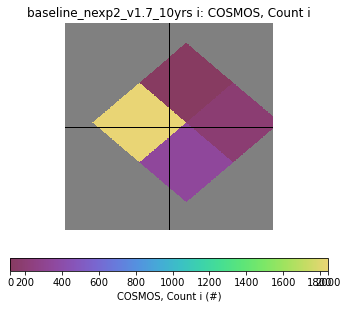

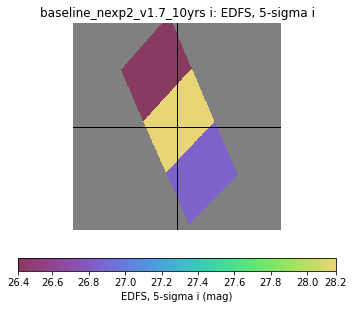

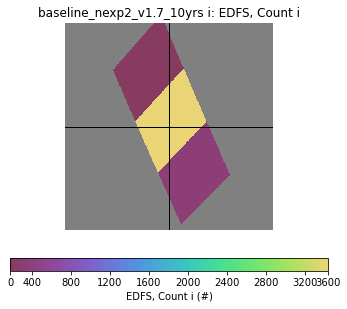

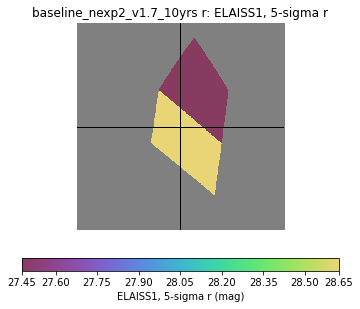

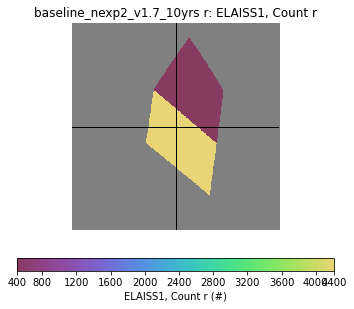

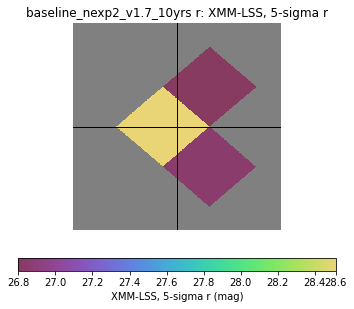

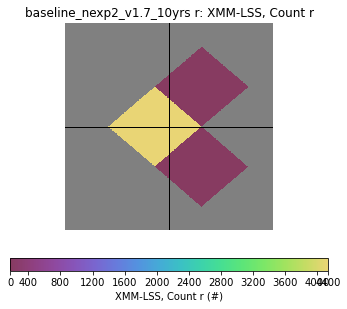

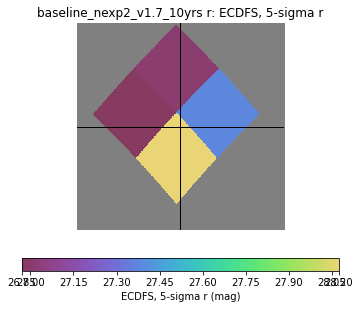

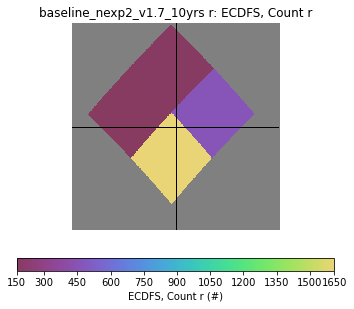

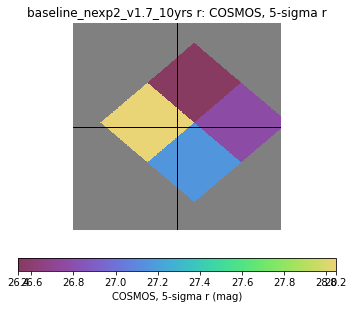

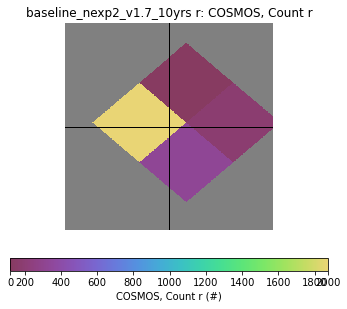

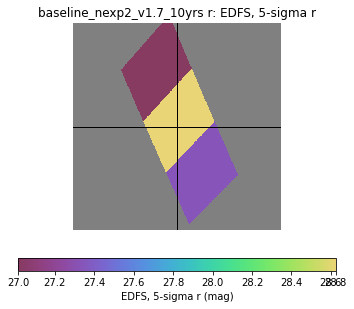

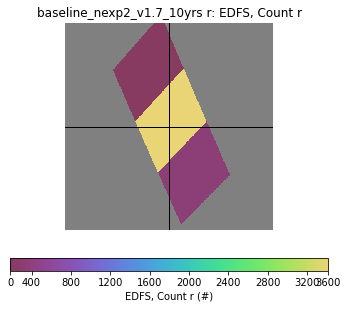

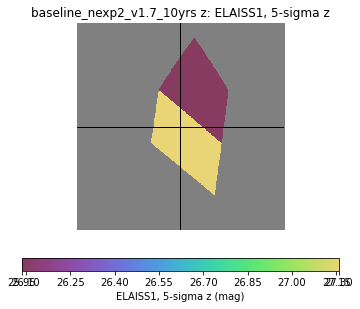

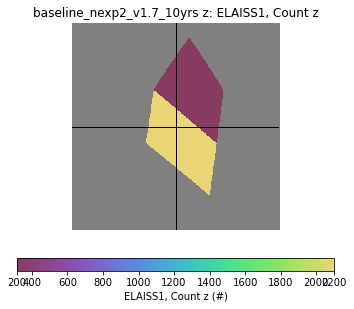

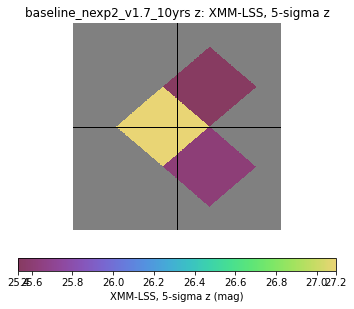

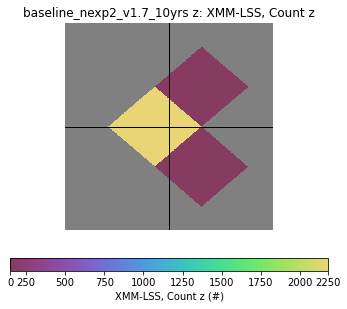

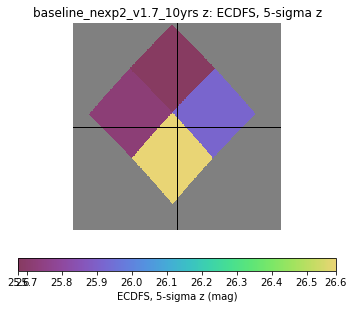

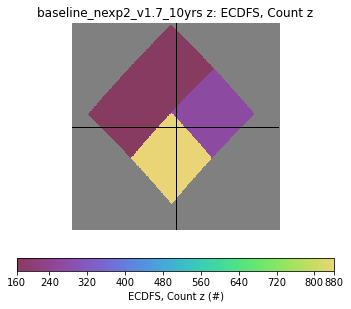

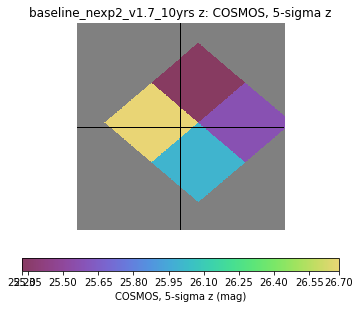

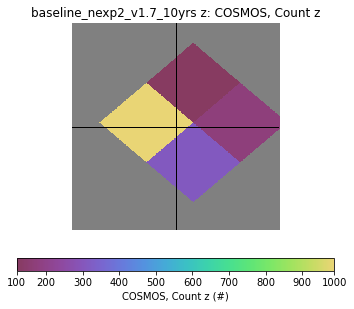

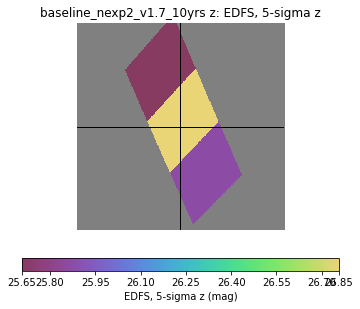

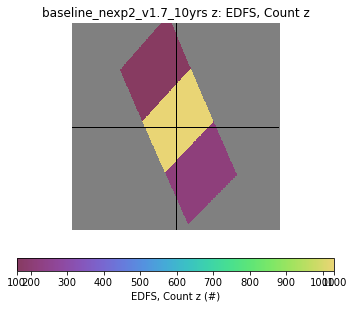

In [17]:
outDir = "temp"
resultsDb = maf.db.ResultsDb(outDir=outDir)


bd = maf.metricBundles.makeBundlesDictFromList(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [ ]:


hp.gnomview(bd['ELAISS1, SNe_nSN'].metricValues, rot=(10,-45,0), xsize=500)